### Simple Linear Regression

Problem Statement:

In order to investigate the feasibility of starting A Sunday edition for a large metropolitan newspaper, information was obtained from a sample of 34 newspapers concerning their daily and Sunday Circulation (in thousands)

In [1]:
#Loading the Required Libaries
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/NewspaperData.csv")
Dataset.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


--> As we need to predict Sunday sales in this Case So,

--> Y is Sunday (Dependent)

--> X is Daily  (Independent)

--> Sunday~Daily

#### Correlation

In [3]:
#Using corr()
Dataset.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


Inference: 

As it can be seen Correlation between Sunday and Daily is 0.95 which indicates Positively Strong Relation

Also this prove Daily is required to Predict Sunday Sales

#### Plotting -- Distribution

<AxesSubplot:xlabel='daily', ylabel='Density'>

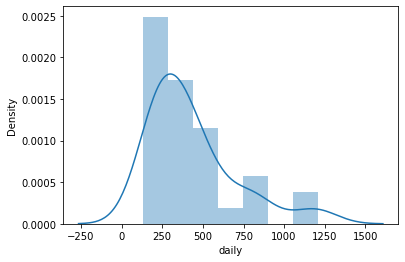

In [4]:
#Distribution Plot for Daily feature
sns.distplot(Dataset.daily)

<AxesSubplot:xlabel='sunday', ylabel='Density'>

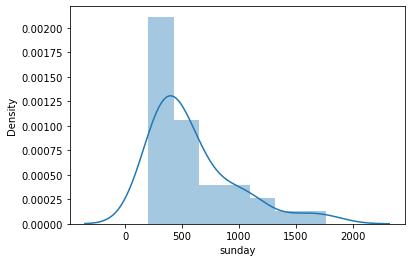

In [5]:
#Distribution Plot for Sunday feature
sns.distplot(Dataset.sunday)

Inference:

Sunday, Daily: Distribution is not normal for both the features, it also seems to be slighty Bimodel on the right hand side, and has positive skewness

#### Model Building --Fitting a Linear Regression model

In [6]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = Dataset).fit()

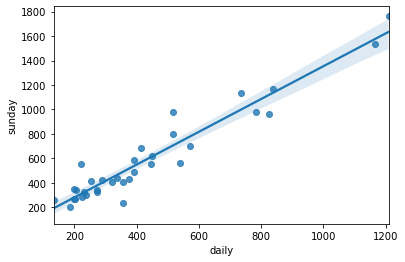

In [7]:
#Best Fit line
sns.regplot(x="daily", y="sunday", data=Dataset);

In [8]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

Inference: Intercept is B0 = 13.8, daily is B1 = 1.33


In [9]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept     0.386427
daily        18.934840
dtype: float64 
 P_values is:  
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


#### Hypothesis in SLR

B0 = Beta0 , B1 = Beta1

H0: B1 = 0, B1--> Slope is Zero Y is not Dependent

H1: B1 ≠ 0, B1--> Slope is not Zero Y is Dependent

In [10]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and Y is Dependent")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and Y is not Dependent")

p_value is: 6.016802409084756e-19 , Reject H0,Slope is not Zero and Y is Dependent


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

Inference: R_squared is 0.91 so the model is a very Good model

#### Predict for new data point

In [12]:
#Predict for 200 and 300 daily circulation
newdata=pd.DataFrame(np.array([200,300]),columns = ["daily"])
newdata

,daily
0,200
1,300


In [13]:
#Predicting 
model.predict(newdata)

0    281.778581
1    415.750057
dtype: float64

Inference: 

For 200 Daily sales, Sunday Sales will be 281

For 300 Daily Sales, Sunday Sales will be 415

#### Manually  Calculating and Checking the regression equation of the model

In [14]:
# Y = B0 + B1X

#B0 = 13.83 - from Build model
#B1 = 1.33  - from Build model
#X = 200    - Datapoint to Predict

Y = 13.8 + 1.33*200
Y

279.8

Inference:

Manually Also Its gives the approx the Same results as the Regression equation built by the Model